In [ ]:
# Run this cell to 
# - create necessary support files, 
# - check that your exploration is formatted correctly, 
# - and submit your work to OK.

ok_spec = """
{
  "name": "Independent Data Exploration",
  "endpoint": "cal/data8/sp17/exploration",
  "src": [
    "exploration.ipynb"
  ],
  "tests": {},
  "protocols": [
      "file_contents",
      "backup"
  ]
}    
"""
    
ok_test = '''
test = {
  'name': 'Check file name',
  'points': 1,
  'suites': [
    {
      'cases': [
        {
          'code': r"""
          >>> # Make sure that you name your submission file exploration.ipynb
          >>> import os
          >>> os.path.exists('exploration.ipynb')
          True
          """,
          'hidden': False,
          'locked': False
        },
      ],
      'scored': True,
      'setup': '',
      'teardown': '',
      'type': 'doctest'
    }
  ]
}
'''
    
import os
    
if not os.path.exists('exploration.ok'):
    with open('exploration.ok', 'w') as out:
        out.write(ok_spec)

if not os.path.exists('tests/q1.py'):
    with open('tests/q1.py', 'w') as out:
        out.write(ok_test)

import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
    
from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
ok.auth(inline=True)
ok.grade('q1')
_ = ok.submit()

# NBA 2015 Rookie Class and Their Impact 

NBA Talent is constantly on the rise, and with the way the NBA Draft is set up, those teams that require the most amount of talent (a.k.a the ones that lost the most in the previous year) usually stand the best chance at acquiring the best prospect out of college using their draft pick.

Now seeing which Rookies actually are a good pick to help a team are dependent on so many different values.

In [206]:
#Let's look at some various tables, NBA Team Stats, NBA stats for all players, and NBA Pre-Season prediction for rookies
nba_stats = Table.read_table("https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv")
nba_player_stats = Table.read_table("NBA Stats.csv")
BPM_and_PER = Table.read_table('BPM.csv').select('Player','BPM', 'PER', 'WS')
nba_draft_order = Table.read_table('Draft Selection.csv').select('Pk', 'Player')
nba_rookies = Table.read_table("historical_projections.csv")

# Rookie Stats Compared to Draft Predictions

Clearly, coming out of NCAA, the Rookie class has clear stars based on their college basketball careers. We expect some of these college stars to impact greatly. However the fun in the draft comes from guessing which prospects will be those stars, while which will be busts/outperform their draft stock. 

Before the draft, scouts give a percentage on how impactful a player will be with the statistics of Projected Statistical Plus/Minus (Projected SPM), and their likelihood to be a Superstar, Starter, Role Player, or Bust. After a whole season of a rookie year, we can see generally who has outperformed expectations, and who has truly not lived up to them.

In [207]:
#First let's join advanced stats table (BPM and PER Table) to the Rookie Table so we only have Rookie Stats here
rookies_2015 = nba_player_stats.join('Player',nba_rookies, 'Player').drop("ID").drop('Position').where('Draft Year', 2015).where('G', are.above(15)).join('Player', BPM_and_PER, 'Player').join('Player', nba_draft_order, 'Player')
rookies_2015

Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,BPM,PER,WS,Pk
Anthony Brown,63,SF,23,LAL,29,11,20.7,1.3,4.3,0.31,0.7,2.4,0.286,0.7,1.9,0.339,0.389,0.6,0.7,0.85,0.3,2.1,2.4,0.7,0.5,0.2,0.5,1.2,4,2015,-1.18704,0,0.0386789,0.379623,0.581698,-5,4.9,-0.3,34
Bobby Portis,359,PF,20,CHI,62,4,17.8,3,7,0.427,0.3,0.8,0.308,2.7,6.2,0.443,0.445,0.8,1.1,0.727,2,3.5,5.4,0.8,0.4,0.4,0.9,1.6,7,2015,-0.314574,0.00314138,0.253027,0.386533,0.357298,-3.3,13.8,1.5,22
Cameron Payne,350,PG,21,OKC,57,1,12.2,2,4.9,0.41,0.6,1.9,0.324,1.4,2.9,0.467,0.475,0.3,0.4,0.792,0.2,1.3,1.5,1.9,0.6,0.1,0.8,1.4,5,2015,-0.604345,0.00953036,0.190084,0.316888,0.483498,-1.3,12.9,1.4,14
Chris McCullough,289,PF,20,BRK,24,4,15.1,1.8,4.5,0.404,0.5,1.4,0.382,1.3,3.1,0.413,0.463,0.5,1,0.478,1,1.8,2.8,0.4,1.2,0.5,0.6,1.6,4.7,2015,-0.630996,0.00656667,0.192133,0.2932,0.5081,-1,12.2,0.3,29
D'Angelo Russell,385,PG,19,LAL,80,48,28.2,4.9,12,0.41,1.6,4.6,0.351,3.3,7.3,0.447,0.478,1.8,2.4,0.737,0.6,2.8,3.4,3.3,1.2,0.2,2.5,1.8,13.2,2015,0.511967,0.152033,0.342283,0.0965833,0.4091,-1.8,13.2,0,2
Darrun Hilliard,199,SG,22,DET,38,2,10.1,1.4,3.4,0.397,0.5,1.3,0.38,0.9,2.1,0.407,0.469,0.8,1.1,0.725,0.1,1.1,1.2,0.7,0.2,0,0.5,0.7,4,2015,-0.997597,0.00133693,0.058582,0.430905,0.509176,-3.6,10.7,0.5,38
Delon Wright,469,PG,23,TOR,27,1,8.5,1.3,3,0.45,0.2,0.5,0.385,1.1,2.5,0.463,0.481,1,1.3,0.743,0.3,1.1,1.4,1.1,0.3,0.1,0.6,0.3,3.8,2015,-0.666006,0.0026507,0.169566,0.359937,0.467846,-0.7,17.8,0.6,20
Devin Booker,56,SG,19,PHO,76,51,27.7,4.8,11.4,0.423,1.3,3.8,0.343,3.5,7.6,0.464,0.48,2.8,3.4,0.84,0.4,2.1,2.5,2.6,0.6,0.3,2.1,3,13.8,2015,0.472577,0.0733667,0.324467,0.390167,0.212,-3.1,11.9,1.9,13
Frank Kaminsky,244,C,22,CHO,81,3,21.1,2.7,6.5,0.41,0.8,2.5,0.337,1.8,4,0.455,0.474,1.3,1.8,0.73,0.9,3.3,4.1,1.2,0.5,0.5,0.7,1.6,7.5,2015,-0.0723525,0.00671836,0.352835,0.327164,0.313283,-1.2,12.5,3.3,9
Jahlil Okafor,337,C,20,PHI,53,48,30,7.5,14.7,0.508,0,0.1,0.167,7.5,14.6,0.511,0.509,2.5,3.7,0.686,2.3,4.7,7,1.2,0.4,1.2,2.3,2.6,17.5,2015,0.521661,0.0587167,0.4099,0.235533,0.29585,-4.1,17.1,1.2,3


If we rank these players by their Player Efficiency Rating, (also assuming they played more than half of the season and averaged over 15 min per game to see if they actually make an impact) we see that 

In [208]:
high_PER = rookies_2015.where('G', are.above(42)).where('MP', are.above(12)).where('Age', are.below(24)).sort('PER', descending=True)
high_PER_list = high_PER.select('Player','PER', 'WS', 'Pk', 'BPM', 'G')
high_PER_list.show()

Player,PER,WS,Pk,BPM,G
Karl-Anthony Towns,22.5,8.3,1,2.8,82
Jahlil Okafor,17.1,1.2,3,-4.1,53
Richaun Holmes,15.9,1.5,37,-0.9,51
Myles Turner,15.4,3.1,11,-2.3,60
Willie Cauley-Stein,15.3,3.8,6,0.7,66
Bobby Portis,13.8,1.5,22,-3.3,62
Norman Powell,13.3,1.6,46,-0.4,49
D'Angelo Russell,13.2,0,2,-1.8,80
Cameron Payne,12.9,1.4,14,-1.3,57
Frank Kaminsky,12.5,3.3,9,-1.2,81


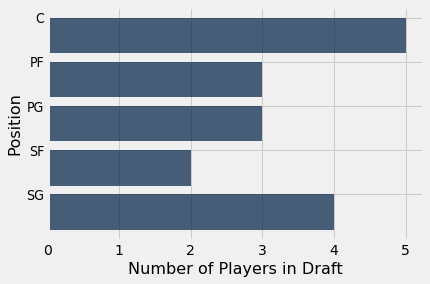

In [209]:
position_impact = high_PER.group('Pos').relabel('Pos', 'Position').relabel('count', 'Number of Players in Draft')
position_impact.barh('Position', 'Number of Players in Draft')

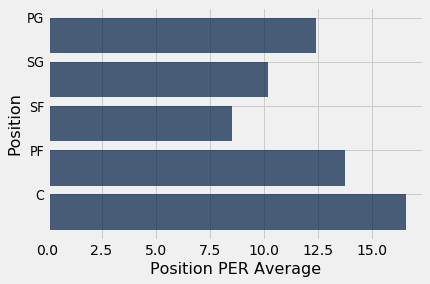

In [210]:
C = sum(high_PER.where('Pos', 'C').column('PER'))/len(high_PER.where('Pos', 'C').column('PER'))
SF = sum(high_PER.where('Pos', 'SF').column('PER'))/len(high_PER.where('Pos', 'SF').column('PER'))
PG = sum(high_PER.where('Pos', 'PG').column('PER'))/len(high_PER.where('Pos', 'PG').column('PER'))
SG = sum(high_PER.where('Pos', 'SG').column('PER'))/len(high_PER.where('Pos', 'SG').column('PER'))
PF = sum(high_PER.where('Pos', 'PF').column('PER'))/len(high_PER.where('Pos', 'PF').column('PER'))
pos_PER_avg = Table().with_columns('Position', make_array('PG', 'SG', 'SF', 'PF', 'C'), 'Position PER Average', make_array(PG, SG, SF, PF ,C))
pos_PER_avg.barh('Position',"Position PER Average" )

We can see from this that the highest impact position as of now are centers. This is where the term recently "Unicorns" came from. These being players with the heigh and length of centers, who have features of that of a wing player (guard or forward).

Now how do we look to see if this is true? We can see the overall trend of PER when compared with certain attributes. What we want to find are the attributes that contribute to PER the most. We can look at the overall attributes, and see when as they get higher, is there a correlation with the PER?

First let's look at Total Rebounds Per Game

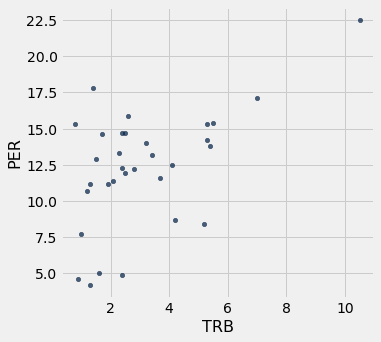

In [218]:
rookies_2015.select('TRB','PER').scatter('TRB')

Next we look at Assists Per Game

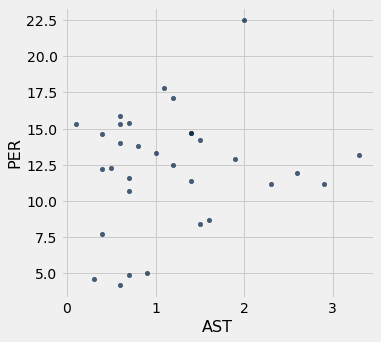

In [219]:
rookies_2015.select('AST','PER').scatter('AST')

Finally, we look at Points Per Game.

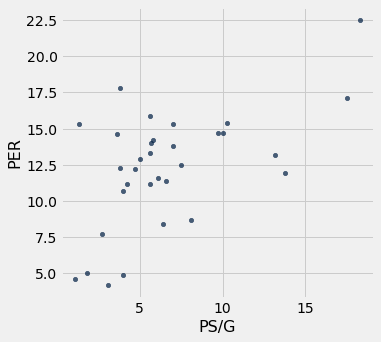

In [220]:
rookies_2015.select('PS/G','PER').scatter('PS/G')

As we can see from these three attributes, the correlation just from an eye-ball looks to vary. Let's see how they actually are by applying the correlation function on them

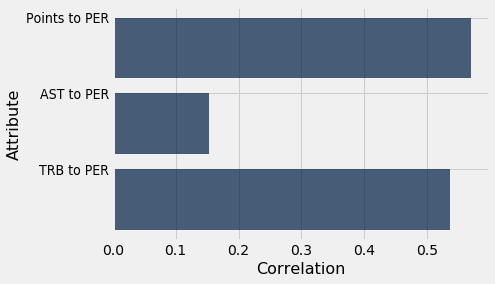

In [221]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))
points_corr = correlation(rookies_2015.select('PS/G','PER'),'PS/G','PER')
ast_corr = correlation(rookies_2015.select('AST', 'PER'), 'AST', 'PER')
rb_corr = correlation(rookies_2015.select('TRB', 'PER'), 'TRB', 'PER')


attribute_corr = Table().with_columns('Attribute', make_array('Points to PER', 'AST to PER', 'TRB to PER'), 
                                      'Correlation', make_array(points_corr, ast_corr, rb_corr))
attribute_corr.barh('Attribute', 'Correlation')


Surprisingly, # of assists made by the player did not affect the overall PER of players in general as much as rebounding did. 

In [223]:

def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(6, 6))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')


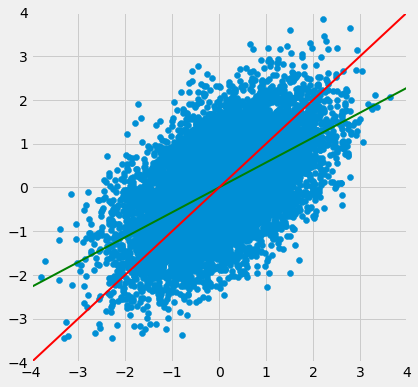

In [217]:
# Let's look at a simulation of multiple of these data points for POINTS/GAME
regression_line(points_corr)

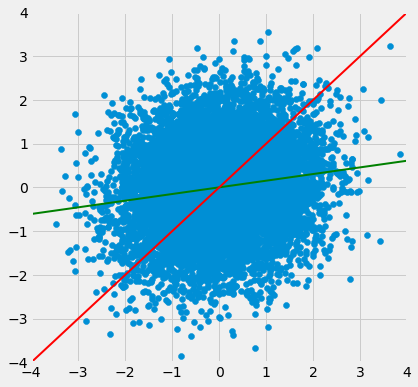

In [224]:
# Let's look at a simulation of multiple of these data points for AST/GAME
regression_line(ast_corr)

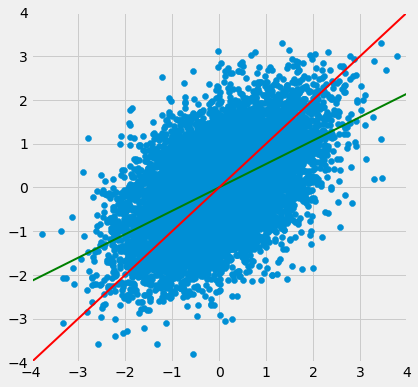

In [226]:
# Let's look at a simulation of multiple of these data points for Total Rebounds/GAME
regression_line(rb_corr)

## We can now see that Points unsurprisingly contribute to PER the most, while assists do not help close to as much as we might have expected

###### Now back to the rookies with a high PER

In [139]:
high_PER_list.show()

Player,PER,WS,Pk,BPM,G
Karl-Anthony Towns,22.5,8.3,1,2.8,82
Jahlil Okafor,17.1,1.2,3,-4.1,53
Richaun Holmes,15.9,1.5,37,-0.9,51
Myles Turner,15.4,3.1,11,-2.3,60
Willie Cauley-Stein,15.3,3.8,6,0.7,66
Bobby Portis,13.8,1.5,22,-3.3,62
Norman Powell,13.3,1.6,46,-0.4,49
D'Angelo Russell,13.2,0,2,-1.8,80
Cameron Payne,12.9,1.4,14,-1.3,57
Frank Kaminsky,12.5,3.3,9,-1.2,81


Out of these high impacting rookies, we want to find potential steals of the draft. Outside of the top 10, we want to find the highest performing athletes

In [161]:
high_PER.where('Pk', are.above(10)).select('Player','MP','PS/G','AST', 'TRB', 'STL', 'WS', 'PER','BPM', 'Pk').sort('WS', descending = True)

Player,MP,PS/G,AST,TRB,STL,WS,PER,BPM,Pk
Myles Turner,22.8,10.3,0.7,5.5,0.4,3.1,15.4,-2.3,11
Josh Richardson,21.3,6.6,1.4,2.1,0.7,2.5,11.4,0.6,40
Trey Lyles,17.3,6.1,0.7,3.7,0.3,2.3,11.6,-2.8,12
Devin Booker,27.7,13.8,2.6,2.5,0.6,1.9,11.9,-3.1,13
Norman Powell,14.8,5.6,1,2.3,0.6,1.6,13.3,-0.4,46
Bobby Portis,17.8,7,0.8,5.4,0.4,1.5,13.8,-3.3,22
Richaun Holmes,13.8,5.6,0.6,2.6,0.4,1.5,15.9,-0.9,37
Cameron Payne,12.2,5,1.9,1.5,0.6,1.4,12.9,-1.3,14
Jerian Grant,16.6,5.6,2.3,1.9,0.7,0.8,11.2,-3.4,19
Rashad Vaughn,14.3,3.1,0.6,1.3,0.4,-0.8,4.2,-6.1,17


If we order by win shares or even by PER, Myles Turner is the clear leader. However, he's still a lottery (top 14) pick in the draft so this is not surprising. To find the true steal of the draft we want to be able to see an athlete who was picked rather late in the draft and still performed well.

However if we look at the overall distribution of PER, it's overall relatively the same, no standouts in PER. What if we don't have any steals in this draft?

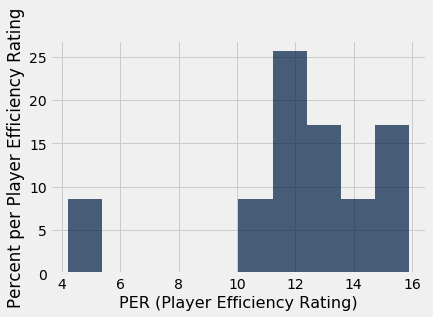

In [184]:
high_PER.where('Pk', are.above(10)).hist('PER', unit = 'Player Efficiency Rating')

#### Null Hypothesis: 
There is no stand-out steal of the draft as all these players are relatively comparable. All are within a 5% ranking of each other. 

#### Alternative Hypothesis: 
There is a player who separates themselves from the rest with their overall game statistics and impact. They have a separation of 5% at least from the next best player.

To do this, let's create a system of how to create an overall image of the player's game using their box score and advanced stats while also weighting their pick in the draft.

(Points + Assists + Steals + Rebounds)/Minutes Played x 0.4 + PER x 0.3 + Pk/60 x 100 x 0.3


In [192]:
pts = high_PER.where('Pk', are.above(10)).column('PS/G')
ast = high_PER.where('Pk', are.above(10)).column('AST')
stl = high_PER.where('Pk', are.above(10)).column('STL')
trb = high_PER.where('Pk', are.above(10)).column('TRB')
mp = high_PER.where('Pk', are.above(10)).column('MP')
rook_per = high_PER.where('Pk', are.above(10)).column('PER')
pk = high_PER.where('Pk', are.above(10)).column('Pk')
ranking = (((pts + ast + stl + trb)/mp *0.4) + (rook_per * 0.3) + (pk/60 * 0.3))
high_PER.where('Pk', are.above(10)).with_column('Ranking', ranking).select('Player','MP','PS/G','AST','Tm', 'TRB', 'STL', 'WS', 'PER','BPM', 'Pk', 'Ranking')

Player,MP,PS/G,AST,Tm,TRB,STL,WS,PER,BPM,Pk,Ranking
Richaun Holmes,13.8,5.6,0.6,PHI,2.6,0.4,1.5,15.9,-0.9,37,5.22167
Myles Turner,22.8,10.3,0.7,IND,5.5,0.4,3.1,15.4,-2.3,11,4.97149
Bobby Portis,17.8,7,0.8,CHI,5.4,0.4,1.5,13.8,-3.3,22,4.55562
Norman Powell,14.8,5.6,1,TOR,2.3,0.6,1.6,13.3,-0.4,46,4.47676
Cameron Payne,12.2,5,1.9,OKC,1.5,0.6,1.4,12.9,-1.3,14,4.23508
Devin Booker,27.7,13.8,2.6,PHO,2.5,0.6,1.9,11.9,-3.1,13,3.91659
Trey Lyles,17.3,6.1,0.7,UTA,3.7,0.3,2.3,11.6,-2.8,12,3.78971
Josh Richardson,21.3,6.6,1.4,MIA,2.1,0.7,2.5,11.4,0.6,40,3.82282
Jerian Grant,16.6,5.6,2.3,NYK,1.9,0.7,0.8,11.2,-3.4,19,3.70801
Rashad Vaughn,14.3,3.1,0.6,MIL,1.3,0.4,-0.8,4.2,-6.1,17,1.49605


We see that Richaun Holmes leads in production ranking with 5.22. He beats out Myles Turner by 0.25018. If we calculate it, Richaun Holmes' production was 5.032294% better than Myles Turner. We reject the Null Hypothesis.

What we can take away from this data is that any player that is on here has a chance to be an impact player based on their first season. All these players, especially the top 5 in our new ranking system allow for 